# Classification

### Part 1

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

encoder = OneHotEncoder(sparse_output=False)
y_iris = encoder.fit_transform(y_iris.reshape(-1, 1))

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2
)


In [26]:
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(X_train_fashion, y_train_fashion), (X_test_mnist, y_test_mnist) = fashion_mnist.load_data()

X_train_mnist = X_train_fashion / 255.0
X_test_mnist = X_test_mnist / 255.0

X_train_mnist = X_train_mnist.reshape(-1, 28, 28, 1)
X_test_mnist = X_test_mnist.reshape(-1, 28, 28, 1)

y_train_mnist = to_categorical(y_train_fashion)
y_test_mnist = to_categorical(y_test_mnist)


### Part 2

nn for iris

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_iris = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  
])

model_iris.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_iris = model_iris.fit(X_train_iris, y_train_iris, validation_data=(X_test_iris, y_test_iris), epochs=50, batch_size=8)


Epoch 1/50
15/15 [==============================] - 1s 16ms/step - loss: 1.1380 - accuracy: 0.3500 - val_loss: 0.9957 - val_accuracy: 0.3667
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.9712 - accuracy: 0.3250 - val_loss: 0.9051 - val_accuracy: 0.6000
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.8812 - accuracy: 0.8250 - val_loss: 0.8180 - val_accuracy: 0.8333
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.7898 - accuracy: 0.7000 - val_loss: 0.7225 - val_accuracy: 0.7667
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.7064 - accuracy: 0.7750 - val_loss: 0.6450 - val_accuracy: 0.9667
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6293 - accuracy: 0.7000 - val_loss: 0.5723 - val_accuracy: 0.8000
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5748 - accuracy: 0.8833 - val_loss: 0.5318 - val_accuracy: 0.8667
Epoch 8/50
15/15 [=

nn for mnist

In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

model_mnist = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  
])

model_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_mnist = model_mnist.fit(X_train_mnist, y_train_mnist, validation_data=(X_test_mnist, y_test_mnist), epochs=10, batch_size=32)


Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3774 - accuracy: 0.8656 - val_loss: 0.2936 - val_accuracy: 0.8933
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2572 - accuracy: 0.9068 - val_loss: 0.3039 - val_accuracy: 0.8875
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2133 - accuracy: 0.9212 - val_loss: 0.2517 - val_accuracy: 0.9115
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1798 - accuracy: 0.9342 - val_loss: 0.2586 - val_accuracy: 0.9087
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1567 - accuracy: 0.9415 - val_loss: 0.2749 - val_accuracy: 0.9042
Epoch 6/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1317 - accuracy: 0.9506 - val_loss: 0.2487 - val_accuracy: 0.9151
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1124 - accuracy: 0.9590 - val_loss: 0.2755 -

### Part 3


In [ ]:
from tensorflow.keras.optimizers import Adam

model_tuned = Sequential([
    Dense(128, activation='tanh', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model_tuned.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history_tuned = model_tuned.fit(X_train_iris, y_train_iris, validation_data=(X_test_iris, y_test_iris), epochs=100, batch_size=16)


Epoch 1/100
8/8 [==============================] - 1s 35ms/step - loss: 1.1565 - accuracy: 0.4833 - val_loss: 0.8990 - val_accuracy: 0.8667
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8316 - accuracy: 0.7000 - val_loss: 0.7257 - val_accuracy: 0.6667
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6770 - accuracy: 0.8333 - val_loss: 0.6095 - val_accuracy: 0.8667
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5933 - accuracy: 0.6750 - val_loss: 0.5291 - val_accuracy: 0.7667
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5194 - accuracy: 0.8333 - val_loss: 0.4970 - val_accuracy: 0.8000
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.4818 - accuracy: 0.8667 - val_loss: 0.4304 - val_accuracy: 0.9000
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.4277 - accuracy: 0.9250 - val_loss: 0.4049 - val_accuracy: 1.0000
Epoch 8/100
8/8 [=========

### Part 4

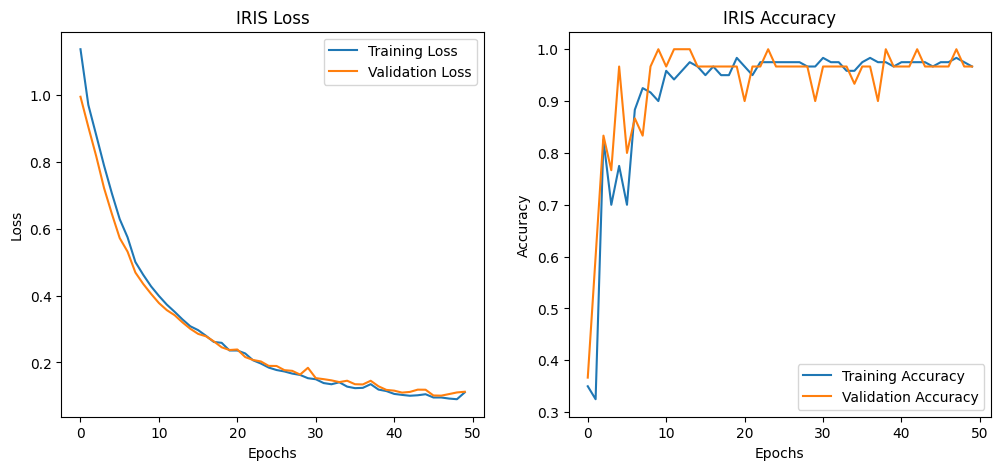

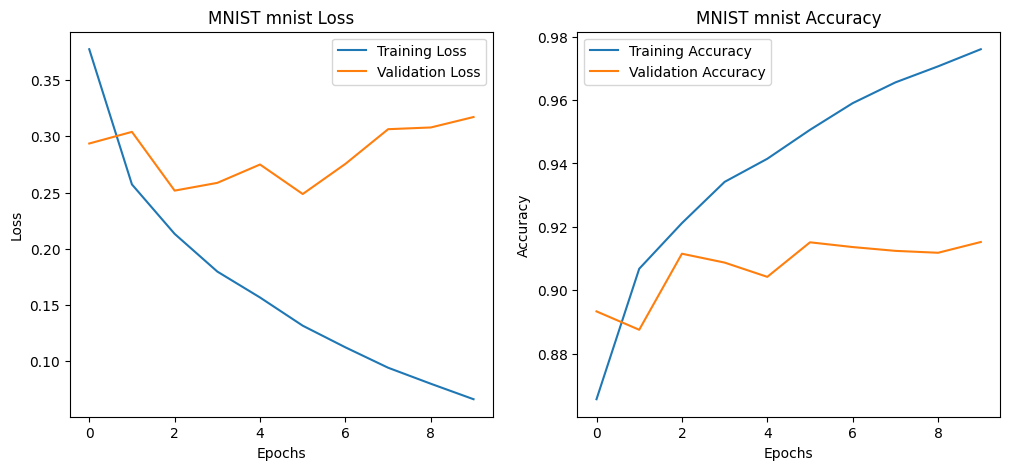

In [30]:
import matplotlib.pyplot as plt

# Function to plot loss and accuracy
def plot_metrics(history, title):
    plt.figure(figsize=(12, 5))
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Plot for IRIS
plot_metrics(history_iris, "IRIS")

# Plot for MNIST mnist
plot_metrics(history_mnist, "MNIST mnist")


### Part 5

In [31]:
model_iris.save_weights('iris_weights.h5')
model_mnist.save_weights('mnist_weights.h5')


earlystopping

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model_iris.fit(X_train_iris, y_train_iris, validation_data=(X_test_iris, y_test_iris),
               epochs=100, batch_size=8, callbacks=[checkpoint, early_stopping])


Epoch 1/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0939 - accuracy: 0.9667 - val_loss: 0.0977 - val_accuracy: 1.0000
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0872 - accuracy: 0.9833 - val_loss: 0.1041 - val_accuracy: 1.0000
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0842 - accuracy: 0.9750 - val_loss: 0.0936 - val_accuracy: 0.9667


c:\Users\Jean\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0849 - accuracy: 0.9667 - val_loss: 0.1054 - val_accuracy: 0.9667
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0848 - accuracy: 0.9750 - val_loss: 0.0880 - val_accuracy: 0.9667
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0856 - accuracy: 0.9750 - val_loss: 0.1099 - val_accuracy: 0.9333
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0949 - accuracy: 0.9583 - val_loss: 0.0881 - val_accuracy: 0.9667
Epoch 8/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0823 - accuracy: 0.9750 - val_loss: 0.0938 - val_accuracy: 1.0000
Epoch 9/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0857 - accuracy: 0.9667 - val_loss: 0.0914 - val_accuracy: 1.0000
Epoch 10/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0811 - accuracy: 0.9750 - val_loss: 0.0861 - val_accuracy: 0.9667
Epoch 11/100

### Part 6


In [33]:
model_mnist.save('mnist_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('mnist_model.h5')

accuracy = loaded_model.evaluate(X_test_mnist, y_test_mnist)[1]
print(f'Loaded Model Accuracy: {accuracy}')


313/313 [==============================] - 2s 5ms/step - loss: 0.3171 - accuracy: 0.9152
Loaded Model Accuracy: 0.9151999950408936
